# Ejercicio 1

En este notebook se pretende crear un sistema estocástico básico para simulaciones. La idea es encontrar el FPT de este proceso y crear un método discreto que sirva para encontrar la probabilidad de pasar el umbral establecido.

Se partirá con la creación de una clase que sea el proceso, el cual es capaz de generar números aleatorios a partir de un sistema básico determinado por una ecuación de evolución (dinámica del sistema).

In [130]:
import numpy as np
from matplotlib import pyplot as plt
import sys

In [132]:
class proceso_aleatorio:

    def __init__(self, x_0, a1, w_mean=0, w_sigma=0.1, seed=42):
        self.x_0 = x_0 # define condicion inicial
        self.x = x_0 # estado del sistema
        self.a1 = a1 # define constante de crecimiento
        
        self.w_mean = w_mean
        self.w_sigma = w_sigma
        np.random.seed(seed)

    def sample(self, n):
        result = []
        x = self.x
        
        for i in range(n):
            w = np.random.normal(self.w_mean, self.w_sigma)
            x = self.a1*x + w
            result.append(x)
        
        return result

In [164]:
mr = proceso_aleatorio(1, 1.01, 0, 0.1, 42)
x = mr.sample(200)

# umbrales
u1 = 2
u2 = 2.25
u3 = 2.5

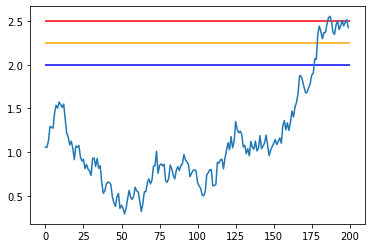

In [165]:
fig, ax = plt.subplots()

ax.plot(x)
ax.hlines(y=u1, xmin=0, xmax=len(x), color='blue', label='umbral 1')
ax.hlines(y=u2, xmin=0, xmax=len(x), color='orange', label='umbral 2')
ax.hlines(y=u3, xmin=0, xmax=len(x), color='red', label='umbral 3')
#ax.legend()
#plt.show()

Una vez hecho el proceso y reproducible, se debe generar la forma de calcular la probabilidad de traspasar el umbral $\bar{x}=2$ (por ejemplo). Dado que la distribución del ruido del proceso es conocida:

\begin{equation}
    w \sim N(\mu, \ \sigma^2)
\end{equation}

La idea es calcular la distribución posterior del proceso y ver dónde podrían caer unos pocos puntos. En el fondo, hacer un Monte Carlo.

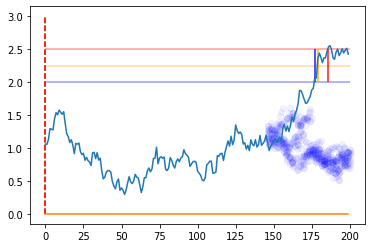

resultado de FPT simulado
t1_r: 177 t1: 0
t2_r: 179 t2: 0
t3_r: 186 t3: 0


In [333]:
# Monte Carlo de un paso
fig, ax = plt.subplots()
#fig2, ax2 = plt.subplots()

ax.plot(x)
ax.hlines(y=2, xmin=0, xmax=len(x), color='blue', label='umbral 1', alpha=0.4)
ax.hlines(y=2.25, xmin=0, xmax=len(x), color='orange', label='umbral 2', alpha=0.4)
ax.hlines(y=2.5, xmin=0, xmax=len(x), color='red', label='umbral 3', alpha=0.4)

t_i = 145
N = 10

n_mean = 0
n_sigma = 0.05

x_i = x[t_i] + np.random.normal(n_mean, n_sigma, N)
PROB = np.zeros((t_i,)).tolist()
T_p = range(len(x))

t1 = 0
t2 = 0
t3 = 0

# FPT reales
t_1 = np.argmax(np.array(x) > u1)
t_2 = np.argmax(np.array(x) > u2)
t_3 = np.argmax(np.array(x) > u3)

ax.vlines(x=t_1, ymin=u1, ymax=u3, color='blue', alpha=0.9)
ax.vlines(x=t_2, ymin=u1, ymax=u3, color='orange', alpha=0.9)
ax.vlines(x=t_3, ymin=u1, ymax=u3, color='red', alpha=0.9)


for i in range(len(x) - t_i):
    t = i + t_i
    
    T = np.ones((10,))*(t + 1)

    X = []
    for j, x_ in enumerate(x_i):
        # para cada elemento del vector de muestras se toman N muestras
        X = np.concatenate((X, 1.001*x_ + np.random.normal(n_mean, n_sigma, N)))
    
    # subsamplear uniformemente el vector X para rescatar
    x_i = np.random.choice(X, N)
    
    ax.scatter(T, x_i, color='b', alpha=0.05)
    
    prob = np.sum(x_i > u1) / len(x_i)
    
    # medicion de FPT
    if np.sum(x_i > u1) and t1==0: t1 = t
    if np.sum(x_i > u2) and t2==0: t2 = t
    if np.sum(x_i > u3) and t3==0: t3 = t

    PROB.append(prob)

ax.plot(T_p, PROB)

ax.vlines(x=t1, ymin=0, ymax=3, color='blue', linestyles='dashed', alpha=0.9)
ax.vlines(x=t2, ymin=0, ymax=3, color='orange', linestyles='dashed', alpha=0.9)
ax.vlines(x=t3, ymin=0, ymax=3, color='red', linestyles='dashed', alpha=0.9)

plt.show()
print('resultado de FPT simulado')
print('t1_r: {} t1: {}\nt2_r: {} t2: {}\nt3_r: {} t3: {}'.format(t_1,t1,t_2,t2,t_3,t3))